<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/09_CONVOLUTION_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Partially connected or convolutional networks 
# WE are not building a CNN from scratch today, but rather going to take a pre-trained model

# CHALLENGE-> WORLD IS INFINITE
# NOBODY CAN GATHER ALL THE DATA THE WORLD 
# SOMETIMES, we have ambitions but not enough data to train a model
# sometimes, we have enough data, but no time to train the model!
# CREATING a model from scratch becomes a WASTE of time and money

# TRANSFER_LEARNING: ability to transfer a model after it has learnt
# what can i transfer?
# 1) ENTIRE MODEL -> MODEL.SAVE -> export the entire model as h5 FILE 
# 2) ONLY THE MODEL SHAPE -> PICKLE -> write model shape into a file and export
# 3) ONLY THE MODEL PARAMS -> PICKLE -> write model weights into a file and export
# SMART WATCH -capable of AI- you could never train an AI model directly on the watch
# so you trained your AI elsewhere, and transfered the learning of (English assistant for example) model 
# to the smaller device!


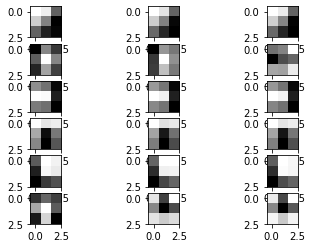

In [6]:
from keras.applications.vgg16 import VGG16 # Later -> we will implement this from scratch
# IMAGE and OBJECT detection 
# popular transfer learning algos: VGG16, ResNET, AlexNet... many many open transferable models available 
import matplotlib.pyplot as plt

model = VGG16()
#model.summary()

filters, biases = model.layers[1].get_weights()
# MIN-MAX normalization -> 0 to 1 scale
# X-Min/Max-Min
#NORMALIZE filters, biases so that they are in same scale and represented between 0 and 1
f_min, f_max = filters.min(), filters.max()
filters_norm = (filters-f_min)/(f_max-f_min)
n_filters, ix = 6, 1 # some variables that i need later (hyperparams)

for i in range(n_filters):
  f = filters[:,:,:,i]
  for j in range(3): # once for each dimension of image R,G,B
    ax = plt.subplot(n_filters, 3, ix)
    plt.imshow(f[:,:,j], cmap='gray')
    ix = ix + 1

plt.show()
# ANY IMAGE PIXEL gets matmul with FILTER
# each filter is a window of weights 
# [[p1,p2],[p3,p4]] X [[c1,c2],[c3,c4]]
# c -> convolution filter 


In [5]:
# to see convolutions, let's filter out all Convolutional layers
# Dense -> FULLY CONNECTED, CONVOLUTIONS-> NOT FULLY CONNECTED
# have weights
# CONVOLUTIONS ARE CHEAPER THAN DENSE, but many many sequences of convolutions are required for learning 
# weights are called FILTERS 
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  filters, biases = layer.get_weights()
  print(layer.name)
  print(filters[0])


block1_conv1
[[[ 0.42947057  0.11727387  0.03401296  0.35422093 -0.0865837
    0.22968295  0.06683242  0.04133838  0.13026784  0.03291035
    0.09615457 -0.09222532 -0.15587331  0.0522968  -0.08324417
    0.15728769  0.0291196   0.05094835  0.19055748 -0.04372229
    0.3618031   0.23902874  0.16667192 -0.18046746  0.04404821
    0.09592837 -0.04381131 -0.1884835  -0.04399502 -0.18985446
   -0.23386982  0.12836744 -0.11059975  0.00571336 -0.24479656
   -0.30530283  0.060938   -0.32816252  0.1711953   0.10265407
   -0.11063665  0.33012986 -0.05869728  0.18478717  0.01050853
    0.10668027 -0.13086924 -0.36283946  0.06440807  0.09335972
    0.00401619  0.37814805  0.05268804 -0.27078936  0.11060741
   -0.11819526  0.04298935  0.35323623 -0.28468162 -0.20289008
   -0.284944   -0.13224158 -0.05334752  0.00757738]
  [ 0.55037946  0.02087744  0.09883115  0.43703237 -0.10985146
   -0.19237703  0.09789737  0.07935189 -0.2751774  -0.14232883
    0.17323188  0.04103169  0.29249442  0.01629656 -0.